# TestCase 1

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config1.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 1
# version : 3
# error_estimations : {'param_num': 2}
# gains : {'n_params': 50}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]   
# high_degree = 10

In [4]:
assert testcase == 1
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

In [8]:
if version == 1:
    from testcases.networks.test_2D.test_1.test_1_v1 import Run_laplacian2D,Poisson_2D
elif version == 2:
    from testcases.networks.test_2D.test_1.test_1_v2 import Run_laplacian2D,Poisson_2D
elif version == 3:
    from testcases.networks.test_2D.test_1.test_1_v3 import Run_laplacian2D,Poisson_2D
else:
    raise ValueError("Version not found")
from testcases.problem.problem_2D import TestCase1
problem = TestCase1(version=version)

Using device: cpu
torch loaded; device is cpu


/home/u2/lecourtier/Article1/code
>> load network /home/u2/lecourtier/Article1/code/networks/test_2D/test_fe1_v3.pth
network loaded
Error  tensor([0.0046])


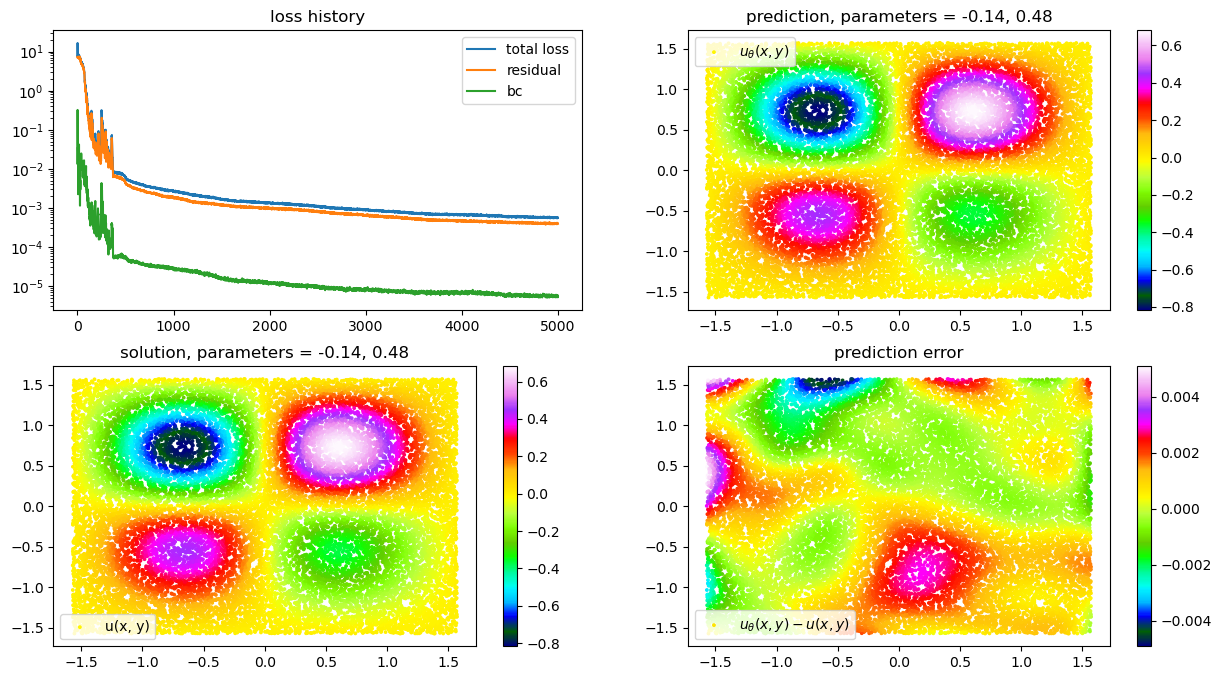

In [9]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [10]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir)
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param2/


### Run FEM

In [12]:
# degree = 1
# df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=True)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param2/FEM_case1_v3_param2_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param2/FEM_case1_v3_param2_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param2/FEM_case1_v3_param2_degree3.csv


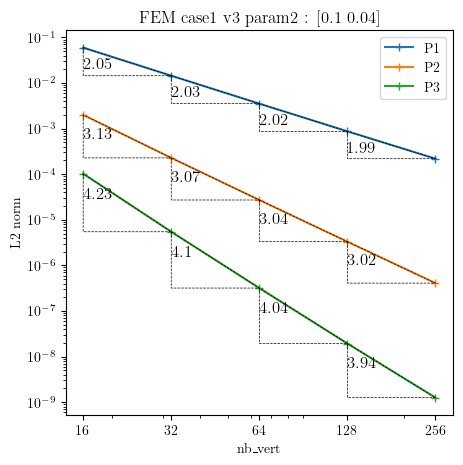

In [13]:
error_estimations.run_fem_alldeg(new_run=False,plot_cvg=True)

### Run Add

In [14]:
# degree = 1
# df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=True)

## Run error estimation with Corr for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.008885765876317436
V created with  16  vertices and degree  1  : h = 0.29619219587722484
V_theta created with  16  vertices and degree  10
The PINN is not trained with the exact boundary conditions
Building point search tree to accelerate distance queries.
Computed bounding box tree with 899 nodes for 450 points.
nb_vert=16, norme_L2=0.0002368549232321919
V created with  32  vertices and degree  1  : h = 0.1433188044567221
V_theta created with  32  vertices and degree  10
The PINN is not trained with the exact boundary conditions
nb_vert=32, norme_L2=6.098424359652716e-05
V created with  64  vertices and degree  1  : h = 0.07052195139934005
V_theta created with  64  vertices and degree  10
The PINN is not trained with the exact boundary conditions
nb_vert=64, norme_L2=1.512220653369689e-05
V created with  128  vertices and degree  1  : h = 0.03498333022172013
V_theta created with  

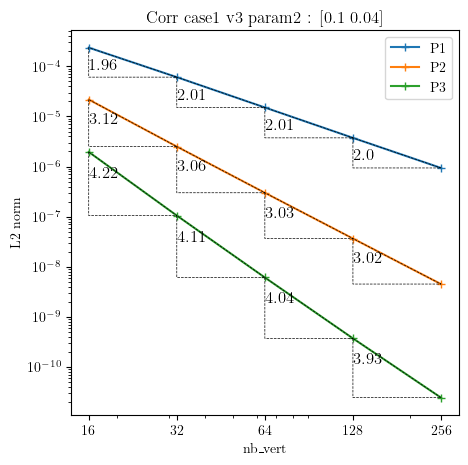

In [15]:
error_estimations.run_corr_alldeg(u_theta,new_run=False,plot_cvg=True)

### Save results

Convergence plots :

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param2/FEM_case1_v3_param2_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param2/FEM_case1_v3_param2_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/cvg/param2/FEM_case1_v3_param2_degree3.csv


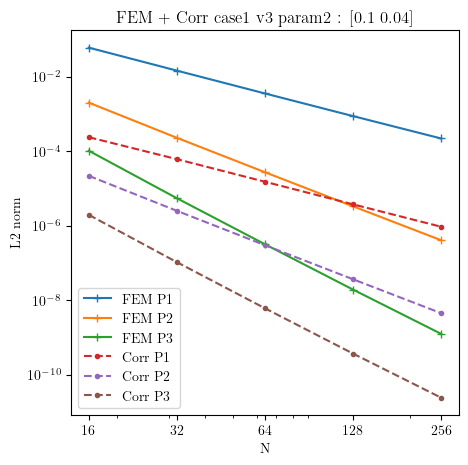

In [16]:
compare_methods.plot_Corr_vs_FEM_alldeg()

In [17]:
compare_methods.save_tab_alldeg_allM()

/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:198: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:202: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:198: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:202: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/comp

Reaching a given precision :

In [18]:
from modfenics.error_estimations.compare import CompareMethodsMeshSize,CompareMethodsDoFs
get_N = CompareMethodsMeshSize(error_estimations)
get_dofs = CompareMethodsDoFs(error_estimations)

In [19]:
get_N.save_tab_given_precisions_alldeg_allM()

In [20]:
get_dofs.save_tab_given_precisions_alldeg_allM(u_theta,tab_M=None)

## degree=1
# given_precision=0.001
V created with  120  vertices and degree  1  : h = 0.03733515074082731
V created with  8  vertices and degree  1  : h = 0.6346975625940523
# given_precision=0.0001
V created with  379  vertices and degree  1  : h = 0.011753658566557199
V created with  25  vertices and degree  1  : h = 0.18512012242326567
## degree=2
# given_precision=0.0001
V created with  42  vertices and degree  2  : h = 0.10836299849166771
V created with  10  vertices and degree  2  : h = 0.49365365979537407
# given_precision=1e-05
V created with  89  vertices and degree  2  : h = 0.05048730611543689
V created with  21  vertices and degree  2  : h = 0.22214414690791862
## degree=3
# given_precision=1e-05
V created with  28  vertices and degree  3  : h = 0.16455121993179198
V created with  11  vertices and degree  3  : h = 0.4442882938158366
# given_precision=1e-06
V created with  48  vertices and degree  3  : h = 0.09452942421613611
V created with  19  vertices and degree  3  : h 

## Gains

### Imports

In [10]:
from modfenics.gains.gains import GainsEnhancedFEM
from modfenics.gains.compare import CompareGainsMethods

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [40]:
n_params = config["gains"]["n_params"]   
gains_enhanced_fem = GainsEnhancedFEM(n_params, problem, repo_dir = repo_dir, tab_degree=[2])
compare_gains_methods = CompareGainsMethods(gains_enhanced_fem)

<class 'modfenics.solver_fem.PoissonDirFEMSolver.PoissonDirSquareFEMSolver'>
## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/


### Run FEM

In [41]:
# degree = 1
# df_FEM, tab_h_FEM, tab_err_FEM = gains_enhanced_fem.run_fem_deg(degree,new_run=False)

In [42]:
gains_enhanced_fem.run_fem_alldeg(new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/FEM_errors_case1_v3_degree2.csv


### Run PINNs

In [43]:
# degree = 1
# df_PINNs, tab_h_PINNs, tab_err_PINNs = gains_enhanced_fem.run_pinns_deg(degree,u_theta,new_run=False)

In [44]:
gains_enhanced_fem.run_pinns_alldeg(u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/PINNs_errors_case1_v3_degree2.csv


### Run Add

In [45]:
# degree = 1
# df_Corr, tab_h_Corr, tab_err_Corr = gains_enhanced_fem.run_corr_deg(degree,u_theta,new_run=False)

In [46]:
gains_enhanced_fem.run_corr_alldeg(u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/Corr_errors_case1_v3_degree2.csv


### Compare methods

In [47]:
degree = 1
# df_errors = compare_gains_methods.create_dferrors_deg_allM(degree)
df_gains = compare_gains_methods.create_dataframes_deg_allM(degree)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/FEM_errors_case1_v3_degree1.csv


In [48]:
compare_gains_methods.create_dataframes_alldeg_allM()

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/FEM_errors_case1_v3_degree2.csv


In [49]:
df_stats = compare_gains_methods.save_stats_deg_allM(degree)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/FEM_errors_case1_v3_degree1.csv
method         PINNs                           FEM                       
type             min     max    mean    std    min     max    mean    std
method n_vert                                                            
Corr   20      21.37   54.17   34.72   6.45  81.13  246.75  168.01  45.92
       40      85.88  220.61  139.04  26.75  80.46  236.88  162.51  43.23


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


In [50]:
compare_gains_methods.save_stats_alldeg_allM()

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version3/gains/FEM_errors_case1_v3_degree2.csv
method           PINNs                                FEM                     
type               min       max     mean      std    min    max   mean    std
method n_vert                                                                 
Corr   20       356.19   1248.67   579.58   179.56  48.74  91.60  70.04  12.06
       40      3046.74  10658.21  4959.71  1534.67  48.42  90.91  69.60  11.98


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")
